<a href="https://colab.research.google.com/github/Mhmd-sh3rawy/Spotify_dataset_NTI/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd

df = pd.read_csv('/content/modified-spotify-data.csv')

In [75]:
df.head()

,Unnamed: 0,track_genre_acoustic,track_genre_afrobeat,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_anime,track_genre_black-metal,track_genre_bluegrass,track_genre_blues,...,liveness,key_sin,key_cos,duration_log,duration_log_z,time_signature_class_boolean,loudness_yeo,is_instrumental,is_dance_hit,temp_zscore
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.266,0.866025,0.500000,1.285290,-0.793708,1.0,0.021554,0.0,0.0,0.300915
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230,0.866025,0.500000,1.462240,-0.205743,1.0,0.511848,0.0,0.0,0.198384
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218,-0.500000,-0.866025,1.311198,-0.707622,1.0,0.578923,0.0,0.0,0.097015
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.371,-0.500000,-0.866025,1.366253,-0.524686,1.0,1.169651,0.0,0.0,0.198617
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.126,0.500000,-0.866025,1.621748,0.324266,1.0,0.620080,0.0,0.0,-0.510868


In [76]:
df['popularity_level'].value_counts()

,count
popularity_level,
1.0,45148
3.0,27020
2.0,8735
0.0,6467
4.0,2370


In [77]:

df=df.drop('popularity', axis=1)

In [78]:
X = df.drop('popularity_level', axis=1)
y = df['popularity_level']

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [80]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote_scaled, y_train_smote)

# Predict
y_train_pred = model.predict(X_train_smote_scaled)
y_test_pred = model.predict(X_test_scaled)

In [81]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9856
Test Accuracy: 0.9830


In [82]:
# Print classification reports
from sklearn.metrics import classification_report

print("\nTraining Classification Report:")
print(classification_report(y_train_smote, y_train_pred))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98     36133
         1.0       1.00      0.99      1.00     36133
         2.0       0.98      0.99      0.98     36133
         3.0       0.99      0.98      0.99     36133
         4.0       0.97      1.00      0.98     36133

    accuracy                           0.99    180665
   macro avg       0.99      0.99      0.99    180665
weighted avg       0.99      0.99      0.99    180665


Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1276
         1.0       1.00      0.99      1.00      9015
         2.0       0.92      0.98      0.95      1746
         3.0       0.99      0.97      0.98      5439
         4.0       0.92      0.99      0.96       472

    accuracy                           0.98     17948
   macro avg       0.96      0.98      0.97     17948
weighted avg

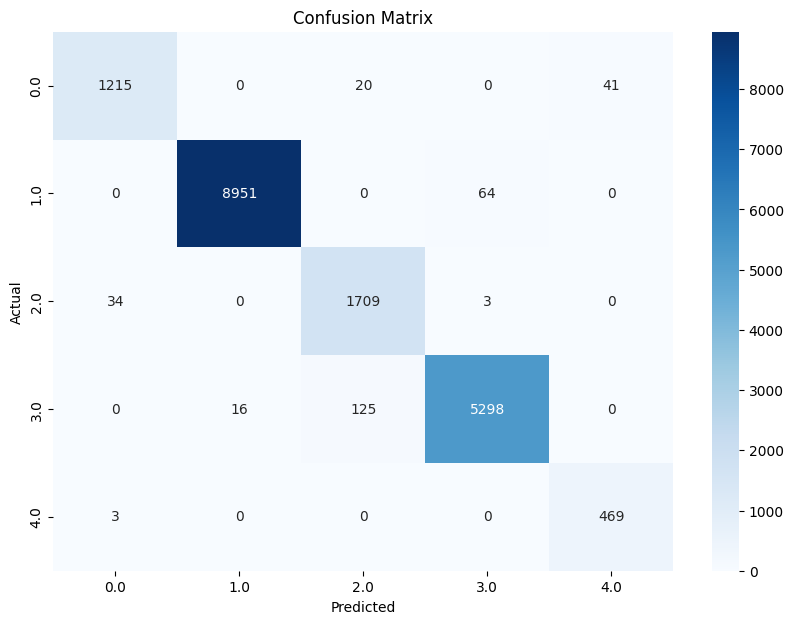

In [83]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
labels = sorted(y_test.unique()) # Define labels here
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

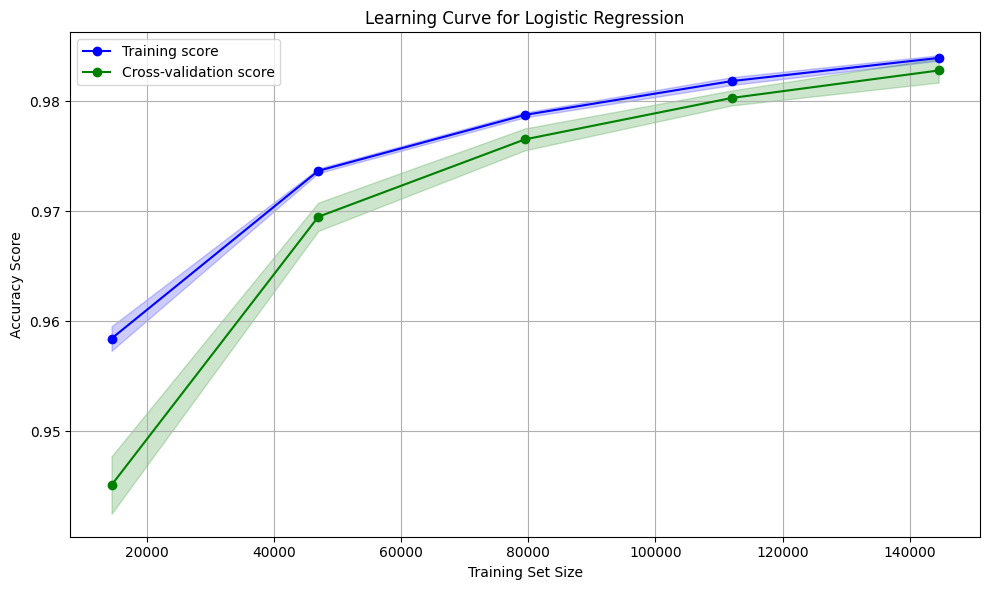

In [85]:
from sklearn.model_selection import learning_curve
import numpy as np

# احصل على بيانات learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model,
    X_train_smote_scaled,
    y_train_smote,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    shuffle=True,
    random_state=42
)

# حساب المتوسط والانحراف المعياري
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# رسم Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()
